In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [4]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [5]:
df[df.duplicated()==True]

,review,sentiment
3537,Quite what the producers of this appalling ada...,negative
3769,My favourite police series of all time turns t...,positive
4391,"Beautiful film, pure Cassavetes style. Gena Ro...",positive
6352,If you liked the Grinch movie... go watch that...,negative
6479,I want very much to believe that the above quo...,negative
...,...,...
49912,This is an incredible piece of drama and power...,positive
49950,This was a very brief episode that appeared in...,negative
49984,Hello it is I Derrick Cannon and I welcome you...,negative
49986,This movie is a disgrace to the Major League F...,negative


In [6]:
new_df = df.drop_duplicates()
new_df.shape

(49582, 2)

In [7]:
new_df['sentiment'].value_counts()

positive    24884
negative    24698
Name: sentiment, dtype: int64

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

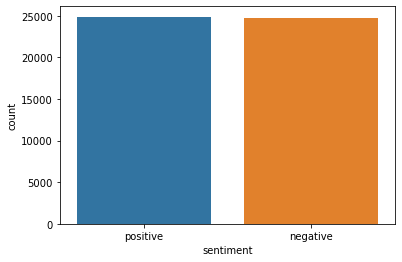

In [8]:
sns.countplot(new_df['sentiment'])

In [9]:
new_df.duplicated().sum()

0

In [10]:
new_df = new_df.replace(to_replace='negative',value=0)
new_df = new_df.replace(to_replace='positive',value=1)
new_df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [11]:
import random
random_index = random.randint(0,len(df)-1)
for x in df[random_index:random_index+5].itertuples():
    _,review,sentiment=x
    print(f"\n\n\nReview:{review}\n\nThis is a {sentiment} review")   




Review:Kurt Russell IS Elvis, plain and simple. His dedication to this role resulted in what I think, is the best movie bio ever. If you're an Elvis fan, see it if you can.<br /><br />The made-for-television film was made two years after Elvis' death.<br /><br />One piece of advice, there are two versions - one at 180 minutes and one at 117 minutes. The only one to watch is the longer one. The shorter one has more than one hour of footage edited out. It just does not work because the scenes in it are often dependent on the scenes that were cut.<br /><br />This masterpiece takes you from Elvis childhood through his emergence as entertainment's greatest star. Shelley Winters and Bing Russell (Kurt's real dad) are excellent as Elvis' parents. And Pat Hingle delivers a very competent Col. Tom Parker.<br /><br />Long live the King!

This is a positive review



Review:<br /><br />Won't be long on this movie. The first half an hour was one of the most boring i have had to face since i've 

In [12]:
from sklearn.model_selection import train_test_split

X = new_df['review']
y = new_df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
X_train.shape

(33219,)

In [57]:
X_train.head()

22105    I gave Timecop a perfect 10, I gave this 1<br ...
14806    In terms of the arts, the 1970s were a very tu...
28237    I've found the movie offensive for Americans w...
31443    "Heartland" is a wonderful depiction of what i...
35145    My wife and I watched this after DVR'ing it of...
Name: review, dtype: object

In [17]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [18]:
text_vectorization = TextVectorization(max_tokens=100000,
                                      output_mode='int',
                                      output_sequence_length=2000,)

In [19]:
text_vectorization.adapt(X_train)

In [20]:
text_vectorization("Hello there this is a sample sentence")

<tf.Tensor: shape=(2000,), dtype=int64, numpy=array([5606,   49,   11, ...,    0,    0,    0], dtype=int64)>

In [21]:
from tensorflow.keras.layers import Embedding

embedding = Embedding(input_dim=100000,
                     output_dim=128, 
                             embeddings_initializer="uniform", 
                             input_length=None,
                             name="embedding_1")

In [22]:
embedding(text_vectorization("Hello there this is a sample sentence")).shape

TensorShape([2000, 128])

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [71]:
tfidf = TfidfVectorizer(stop_words='english')

In [72]:
X_train_tfif = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [73]:
from sklearn.naive_bayes import MultinomialNB
model_1 = MultinomialNB()

In [74]:
model_1.fit(X_train_tfif,y_train)

MultinomialNB()

In [79]:
from sklearn.metrics import accuracy_score

def pred_and_metrics(model,test_labels,test_targets):
    pred = model.predict(test_labels)
    print("Accuracy:",accuracy_score(test_targets,pred)*100)    

In [80]:
pred_and_metrics(model_1,X_test_tfidf,y_test)

Accuracy: 86.2066858155595


In [93]:
def new_pred(new_review):
    l=[]
    l.append(new_review)
    vect = tfidf.transform(l)
    if model_1.predict(vect) == 0:
        print("Negative Review")
    else:
        print("Positive Review")

In [96]:
new_pred("This movie was boring")

Negative Review


In [97]:
new_pred("This movie was excellent")

Positive Review


In [23]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),batch_size=32,dtype='string')
x = text_vectorization(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model_2 = tf.keras.Model(inputs,outputs,name='model_2')
model_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [121]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(32, 1)]                 0         
                                                                 
 text_vectorization_1 (TextV  (None, 2000)             0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 2000, 128)         12800000  
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 12,800,129
Trainable params: 12,800,129
Non-t

In [125]:
history_2 = model_2.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1039/1039 [==============================] - 111s 107ms/step - loss: 0.0714 - accuracy: 0.9788 - val_loss: 0.3020 - val_accuracy: 0.8945
Epoch 2/10
1039/1039 [==============================] - 110s 106ms/step - loss: 0.0646 - accuracy: 0.9812 - val_loss: 0.2980 - val_accuracy: 0.8957
Epoch 3/10
1039/1039 [==============================] - 4768s 5s/step - loss: 0.0580 - accuracy: 0.9839 - val_loss: 0.3265 - val_accuracy: 0.8910
Epoch 4/10
1039/1039 [==============================] - 107s 103ms/step - loss: 0.0516 - accuracy: 0.9862 - val_loss: 0.3852 - val_accuracy: 0.8748
Epoch 5/10
1039/1039 [==============================] - 111s 107ms/step - loss: 0.0467 - accuracy: 0.9881 - val_loss: 0.3284 - val_accuracy: 0.8941
Epoch 6/10
1039/1039 [==============================] - 107s 103ms/step - loss: 0.0426 - accuracy: 0.9891 - val_loss: 0.3263 - val_accuracy: 0.8979
Epoch 7/10
1039/1039 [==============================] - 106s 102ms/step - loss: 0.0372 - accuracy: 0.9913 - val_lo

In [126]:
model_2.evaluate(X_test,y_test)

512/512 [==============================] - 10s 19ms/step - loss: 0.3722 - accuracy: 0.8913


[0.372242271900177, 0.8913401961326599]

In [25]:
inputs = layers.Input(shape=(1,),batch_size=32,dtype='string')
x = text_vectorization(inputs)
x = embedding(x)
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.LSTM(64,return_sequences=True)(x)
x = layers.LSTM(64)(x)
#x = layers.Dense(64,activation='relu')(x)
#x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model_3 = tf.keras.Model(inputs,outputs,name='model_3')
model_3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [138]:
history_3 = model_3.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
 205/1039 [====>.........................] - ETA: 27:18 - loss: 0.6934 - accuracy: 0.5066

KeyboardInterrupt: 